Importing Modules

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

import tensorflow as tf

from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow import keras
from tensorflow.keras import layers

Load the dataset

In [109]:
df = pd.read_csv("merc.csv")

df.sample(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
12764,GL Class,2016,31750,Automatic,42000,Diesel,260,42.8,3.0
9679,GLE Class,2016,28500,Automatic,20000,Diesel,205,47.9,2.1
5045,C Class,2019,29950,Semi-Auto,9613,Diesel,150,61.4,2.0
774,GLC Class,2017,22750,Semi-Auto,29929,Diesel,145,56.5,2.1
11975,C Class,2017,20880,Automatic,19752,Petrol,145,48.7,2.0
12167,C Class,2014,13500,Automatic,49409,Diesel,20,64.2,2.1
3658,GLC Class,2019,41995,Semi-Auto,1367,Diesel,150,40.4,2.0
3180,E Class,2019,30980,Semi-Auto,4831,Diesel,145,61.4,2.0
9041,C Class,2017,16495,Semi-Auto,34270,Diesel,30,64.2,1.6
10529,V Class,2018,32748,Automatic,12392,Diesel,145,45.6,2.1


In [110]:
# Apply one-hot encoding to all categorical variables
data = pd.get_dummies(df)
print("\nDataFrame after one-hot encoding:")
print(data.head())


DataFrame after one-hot encoding:
   year  price  mileage  tax   mpg  engineSize  model_ A Class  \
0  2005   5200    63000  325  32.1         1.8           False   
1  2017  34948    27000   20  61.4         2.1           False   
2  2016  49948     6200  555  28.0         5.5           False   
3  2016  61948    16000  325  30.4         4.0           False   
4  2016  73948     4000  325  30.1         4.0           False   

   model_ B Class  model_ C Class  model_ CL Class  ...  model_220  model_230  \
0           False           False            False  ...      False      False   
1           False           False            False  ...      False      False   
2           False           False            False  ...      False      False   
3           False           False            False  ...      False      False   
4           False           False            False  ...      False      False   

   transmission_Automatic  transmission_Manual  transmission_Other  \
0          

Columns

In [111]:
data.columns

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize',
       'model_ A Class', 'model_ B Class', 'model_ C Class', 'model_ CL Class',
       'model_ CLA Class', 'model_ CLC Class', 'model_ CLK',
       'model_ CLS Class', 'model_ E Class', 'model_ G Class',
       'model_ GL Class', 'model_ GLA Class', 'model_ GLB Class',
       'model_ GLC Class', 'model_ GLE Class', 'model_ GLS Class',
       'model_ M Class', 'model_ R Class', 'model_ S Class', 'model_ SL CLASS',
       'model_ SLK', 'model_ V Class', 'model_ X-CLASS', 'model_180',
       'model_200', 'model_220', 'model_230', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto',
       'fuelType_Diesel', 'fuelType_Hybrid', 'fuelType_Other',
       'fuelType_Petrol'],
      dtype='object')

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    13119 non-null  int64  
 1   price                   13119 non-null  int64  
 2   mileage                 13119 non-null  int64  
 3   tax                     13119 non-null  int64  
 4   mpg                     13119 non-null  float64
 5   engineSize              13119 non-null  float64
 6   model_ A Class          13119 non-null  bool   
 7   model_ B Class          13119 non-null  bool   
 8   model_ C Class          13119 non-null  bool   
 9   model_ CL Class         13119 non-null  bool   
 10  model_ CLA Class        13119 non-null  bool   
 11  model_ CLC Class        13119 non-null  bool   
 12  model_ CLK              13119 non-null  bool   
 13  model_ CLS Class        13119 non-null  bool   
 14  model_ E Class          13119 non-null

What is the shape of the data

In [113]:
data.shape

(13119, 41)

Let's study the data

In [114]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


Empty rows

In [115]:
# Drop empty rows
data = data.dropna()

In [116]:
data_corr = data.corr()

Let's Visualize

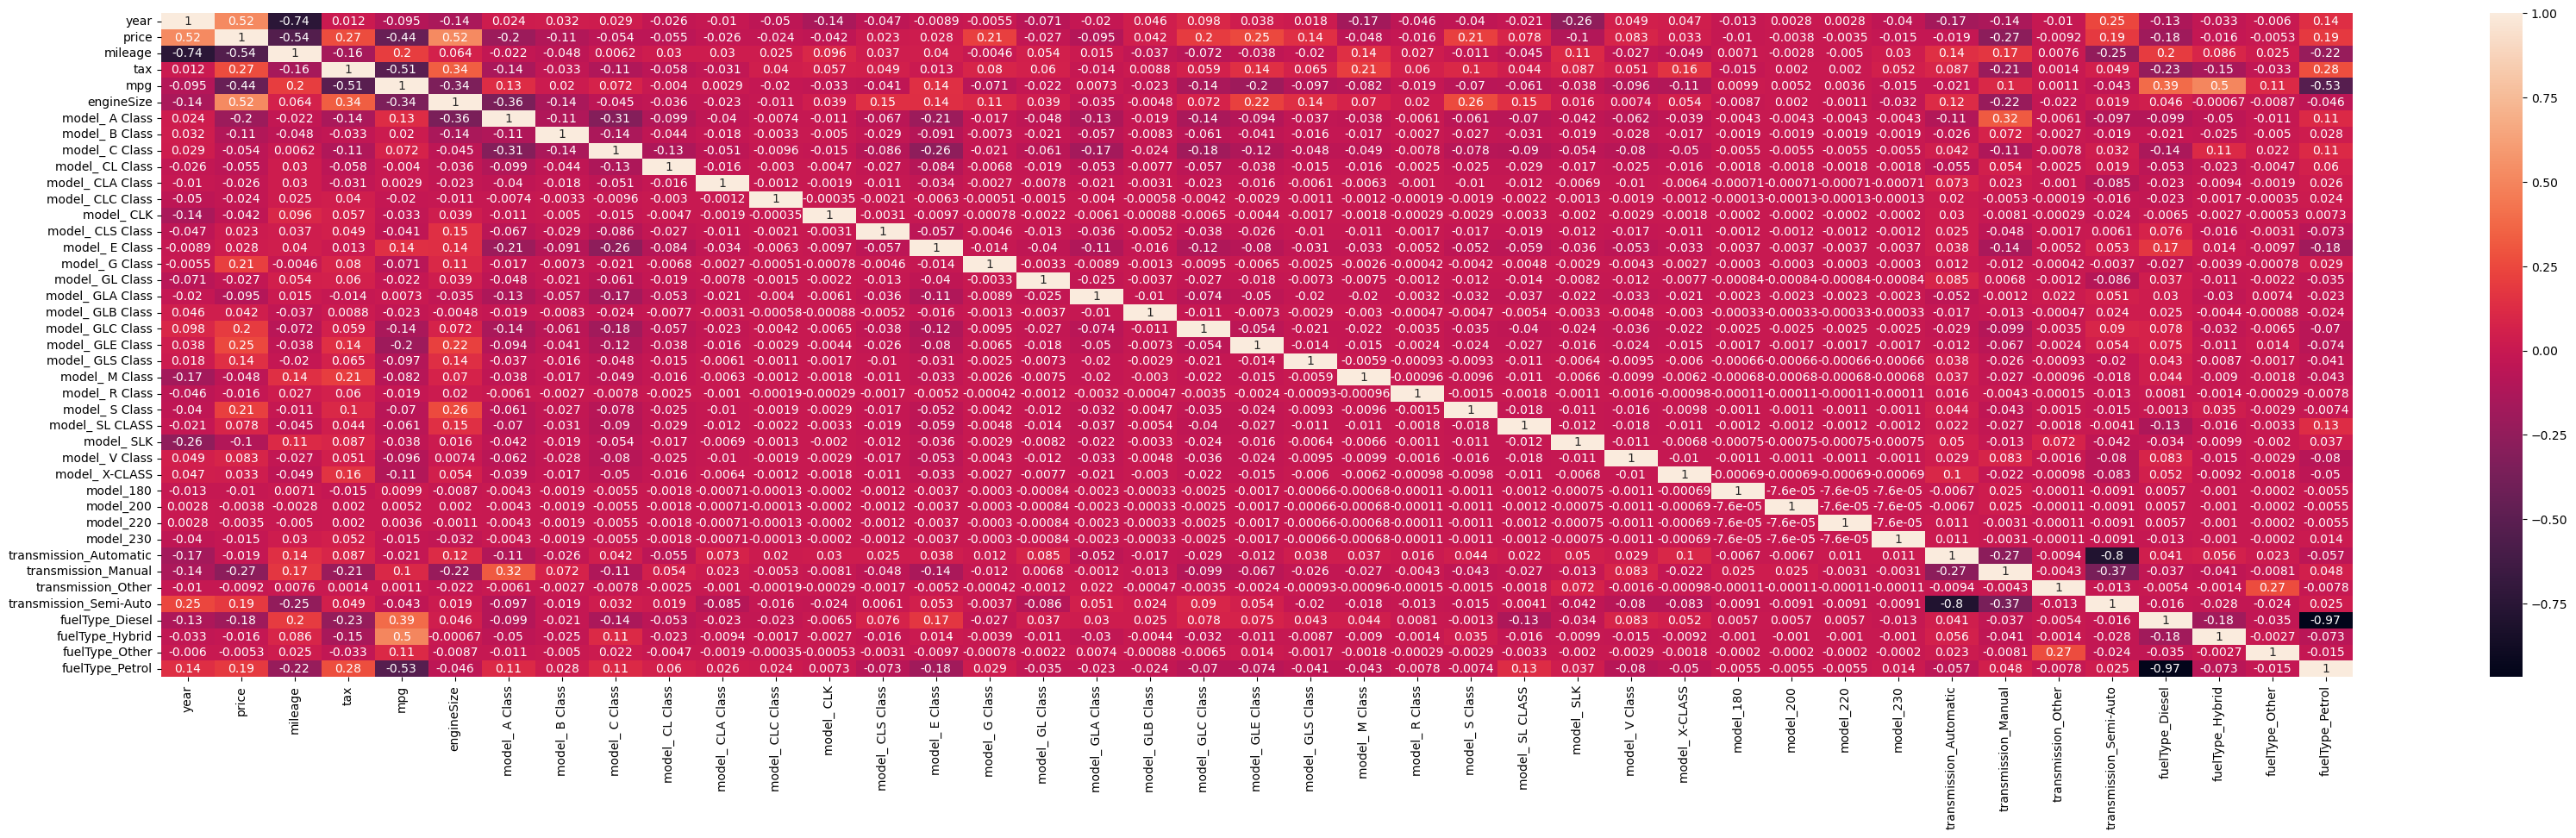

In [117]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(41, 10))

sns.heatmap(data_corr, annot=True)

plt.show()

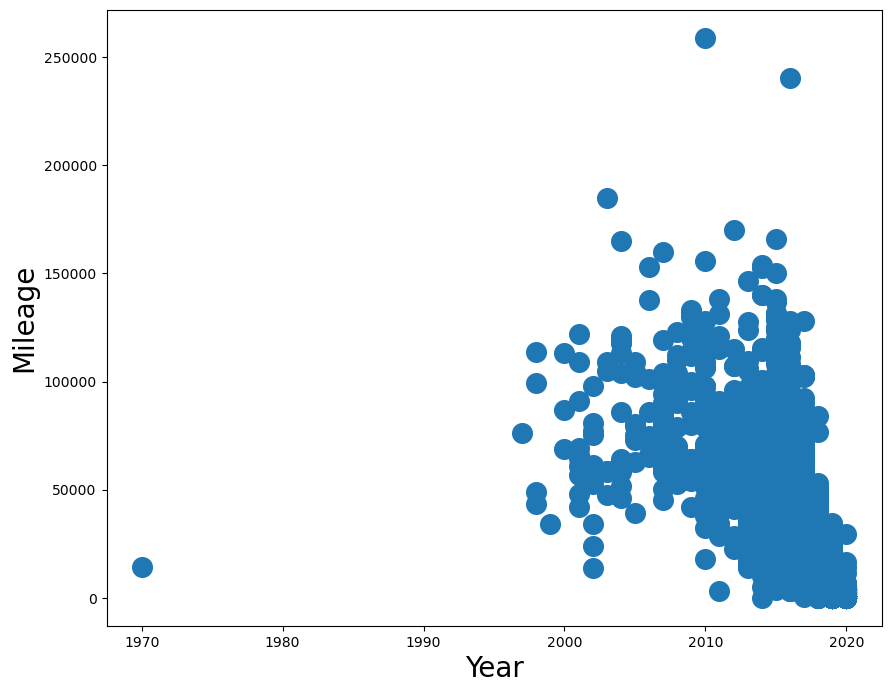

In [118]:
plt.figure(figsize=(10, 8))

plt.scatter(data['year'], data['mileage'], s=200)

plt.xlabel('Year', fontsize=20)
plt.ylabel('Mileage', fontsize=20)
plt.show()

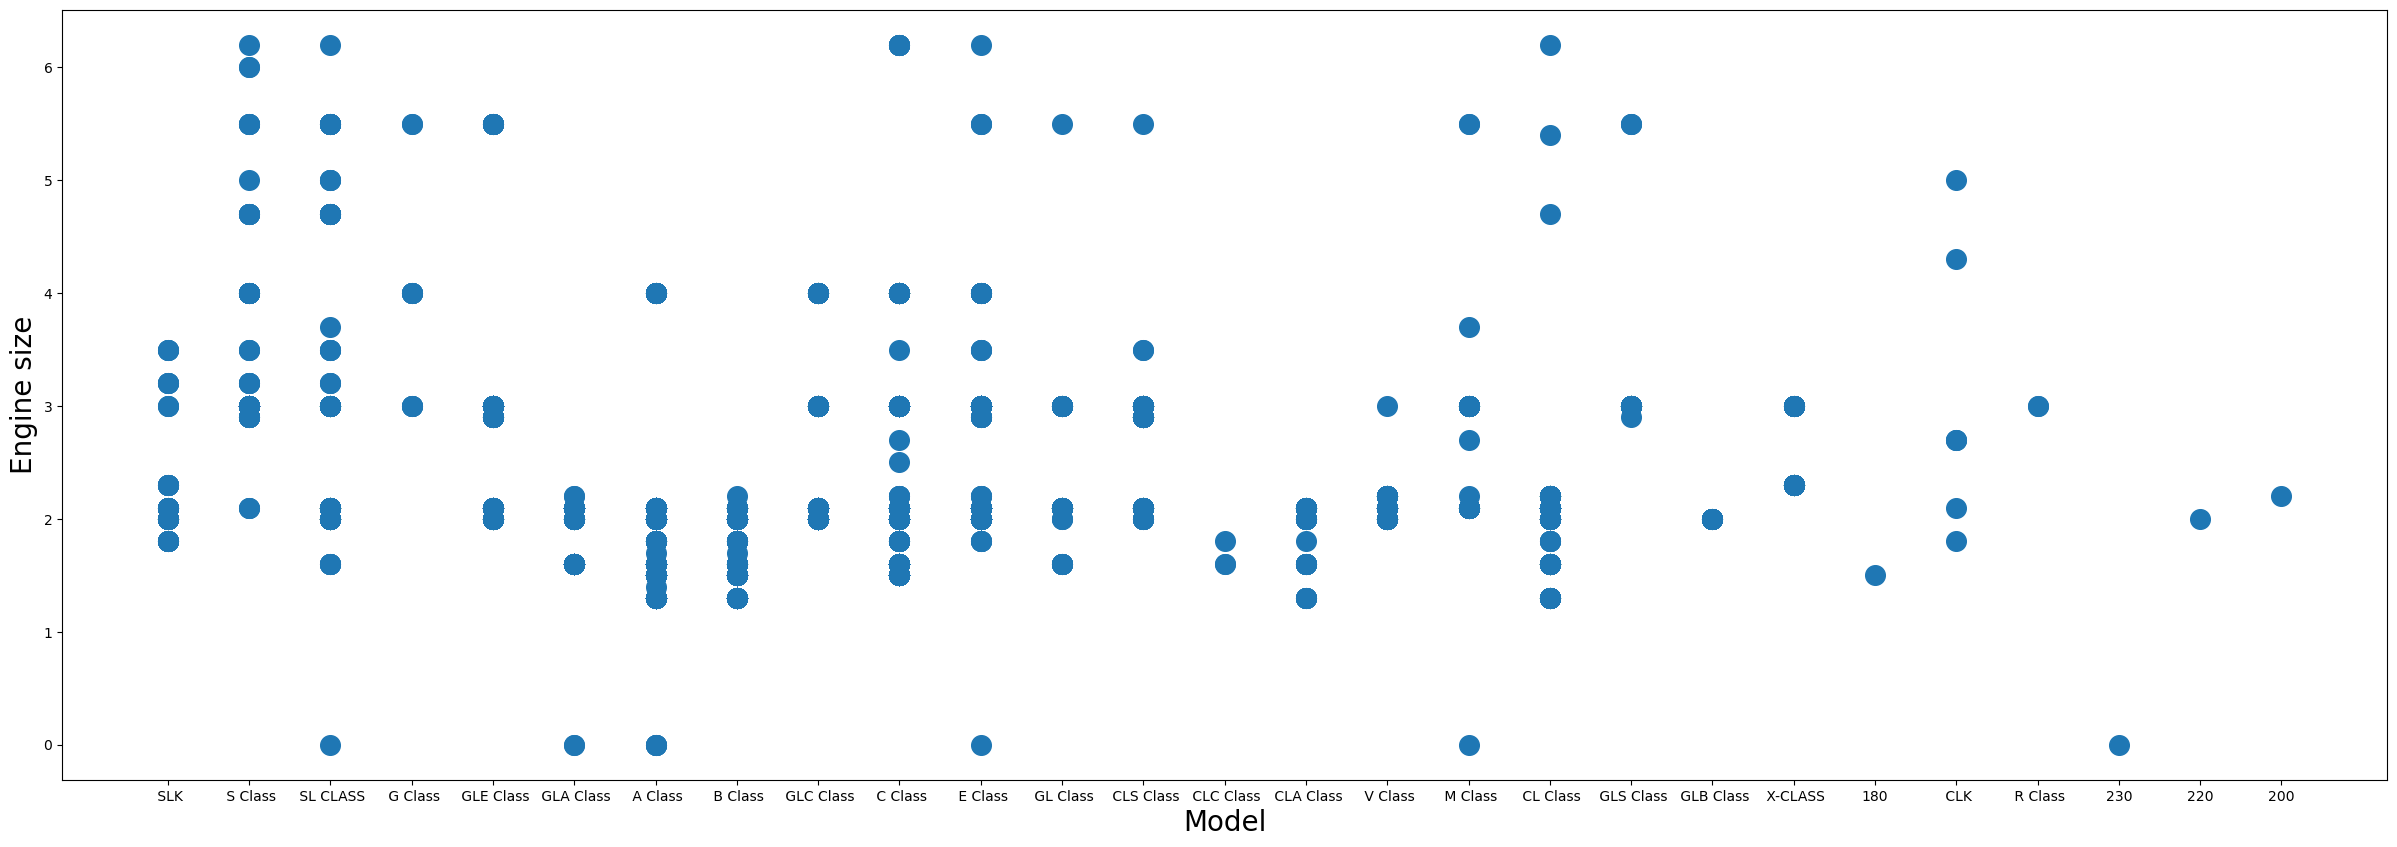

In [119]:
plt.figure(figsize=(30, 10))

plt.scatter(df['model'], data['engineSize'], s=200)

plt.xlabel('Model', fontsize=20)
plt.ylabel('Engine size', fontsize=20)
plt.show()

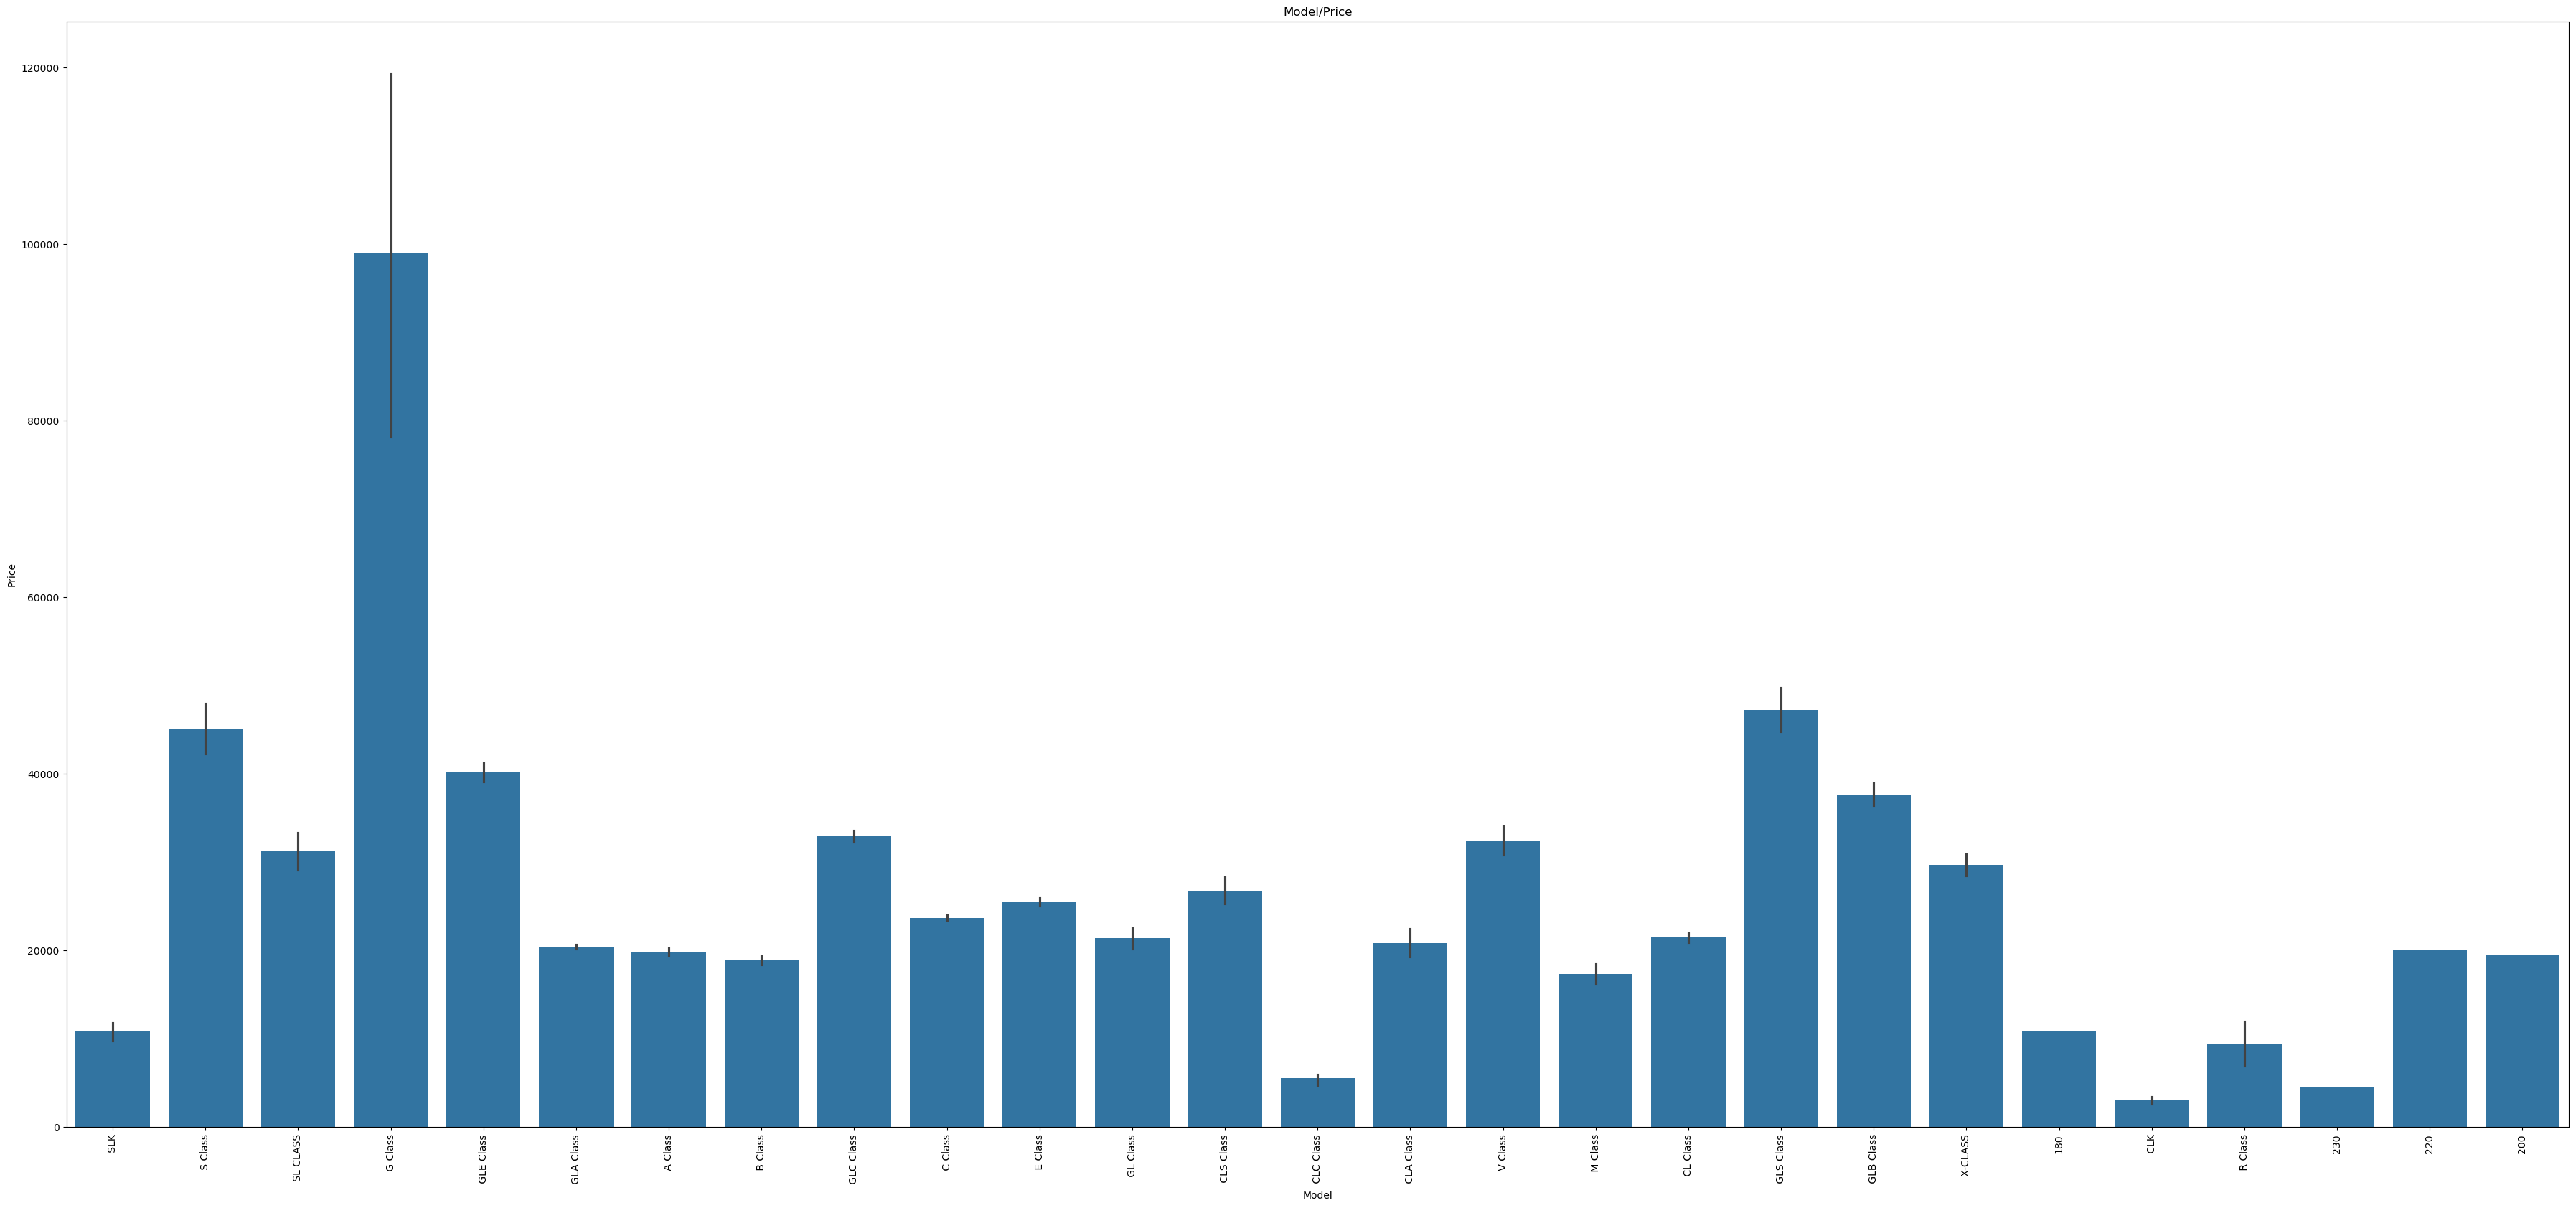

In [120]:
data_model = df.model
data_price = data.price
#Visiualization
plt.figure(figsize=(45,20))
sns.barplot(x = data_model, y = data_price)
plt.xticks(rotation = 90) # rotation of countries's names
plt.xlabel('Model')
plt.ylabel('Price')
plt.title('Model/Price')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_26192\1007958867.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["price"])


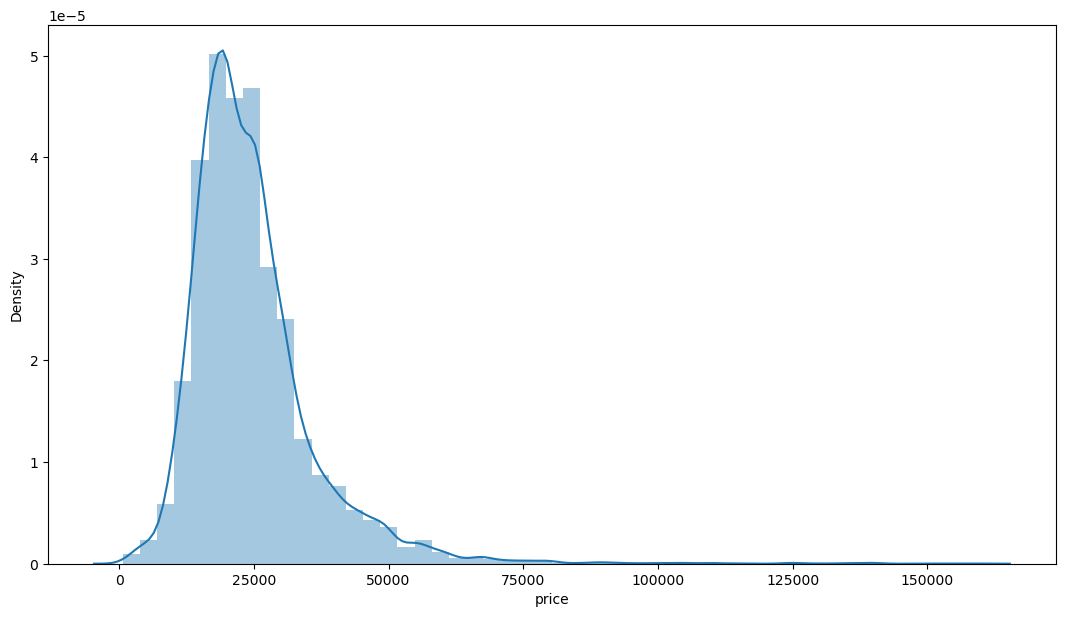

In [121]:
plt.figure(figsize=(13,7))
sns.distplot(data["price"])
plt.show()

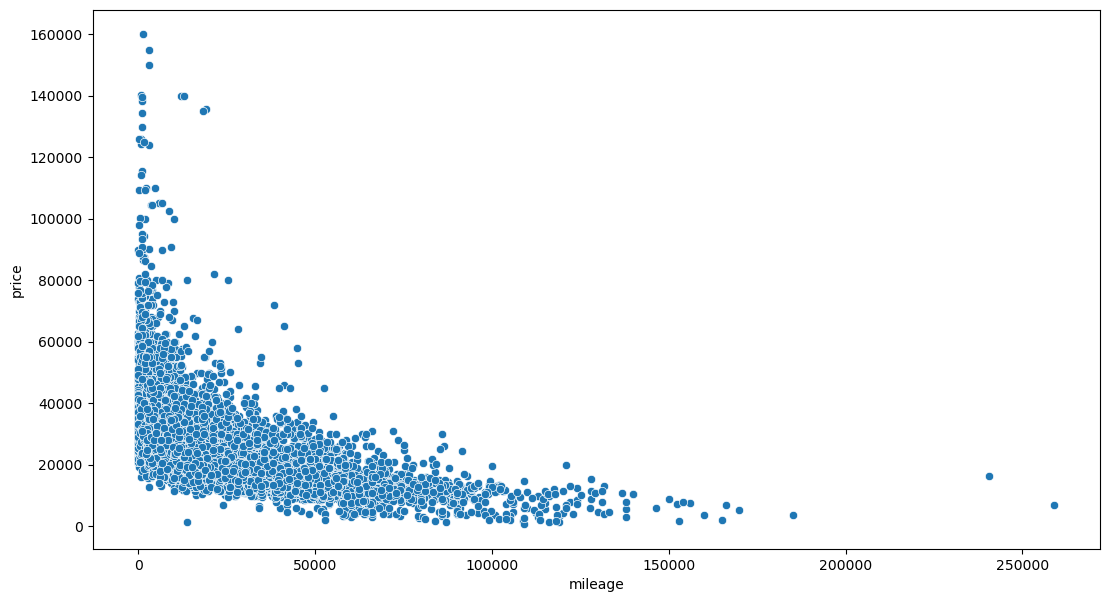

In [122]:
plt.figure(figsize=(13,7))
sns.scatterplot(x=data.mileage, y=data.price, data=data)
plt.show()

In [123]:
target = data['price']                 # price column
processedfeatures = data.drop(columns=['price'])  # everything except price


Splitting

In [124]:
x_train, x_test, y_train, y_test = train_test_split(
    processedfeatures,  # X
    target,             # y
    test_size=0.2, 
    random_state=1
)

Standard Scaler

In [135]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)  # fit on train
x_test = scaler.transform(x_test)        # transform test

import joblib

# Suppose 'scaler' is your trained StandardScaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

Building Model

In [126]:
def build_model():
    model = tf.keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(
        loss='mse',
        optimizer=optimizer,
        metrics=['mae', 'mse']
    )
    return model

In [127]:
model_relu_64 = build_model()

model_relu_64.summary()

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,489 (13.63 KB)

 Trainable params: 3,489 (13.63 KB)

 Non-trainable params: 0 (0.00 B)

In [128]:
keras.utils.plot_model(model_relu_64, 'model_elu_64_shapes.png', show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


Train Model

In [129]:
model_relu_64 = build_model()

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

training_history = model_relu_64.fit(x_train, 
                                       y_train, 
                                       epochs=1000, 
                                       validation_split = 0.2, 
                                       verbose=1, 
                                       callbacks=[early_stop])

Epoch 1/1000
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 739079296.0000 - mae: 24587.0918 - mse: 739079296.0000 - val_loss: 714354944.0000 - val_mae: 24104.4844 - val_mse: 714354944.0000
Epoch 2/1000
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 701226048.0000 - mae: 23720.8945 - mse: 701226048.0000 - val_loss: 546132480.0000 - val_mae: 21155.7871 - val_mse: 546132480.0000
Epoch 3/1000
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 487116320.0000 - mae: 19819.7754 - mse: 487116320.0000 - val_loss: 274488352.0000 - val_mae: 14815.9404 - val_mse: 274488352.0000
Epoch 4/1000
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 212688288.0000 - mae: 12844.2695 - mse: 212688288.0000 - val_loss: 120340984.0000 - val_mae: 8918.3379 - val_mse: 120340984.0000
Epoch 5/1000
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 98895688.0000 - mae: 7835.4653 - mse: 98895688.0000 - val_loss: 73619760.0000 - val_mae: 6403.8799 - val_mse: 73619760.0000
Epoch 6/1000
263/263 ━━━━━━━━━━━━━━━━━━

In [130]:
model_relu_64.evaluate(x_test, y_test)

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - loss: 13781763.0000 - mae: 2363.7095 - mse: 13781763.0000


[14213204.0, 2367.282958984375, 14213204.0]

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step


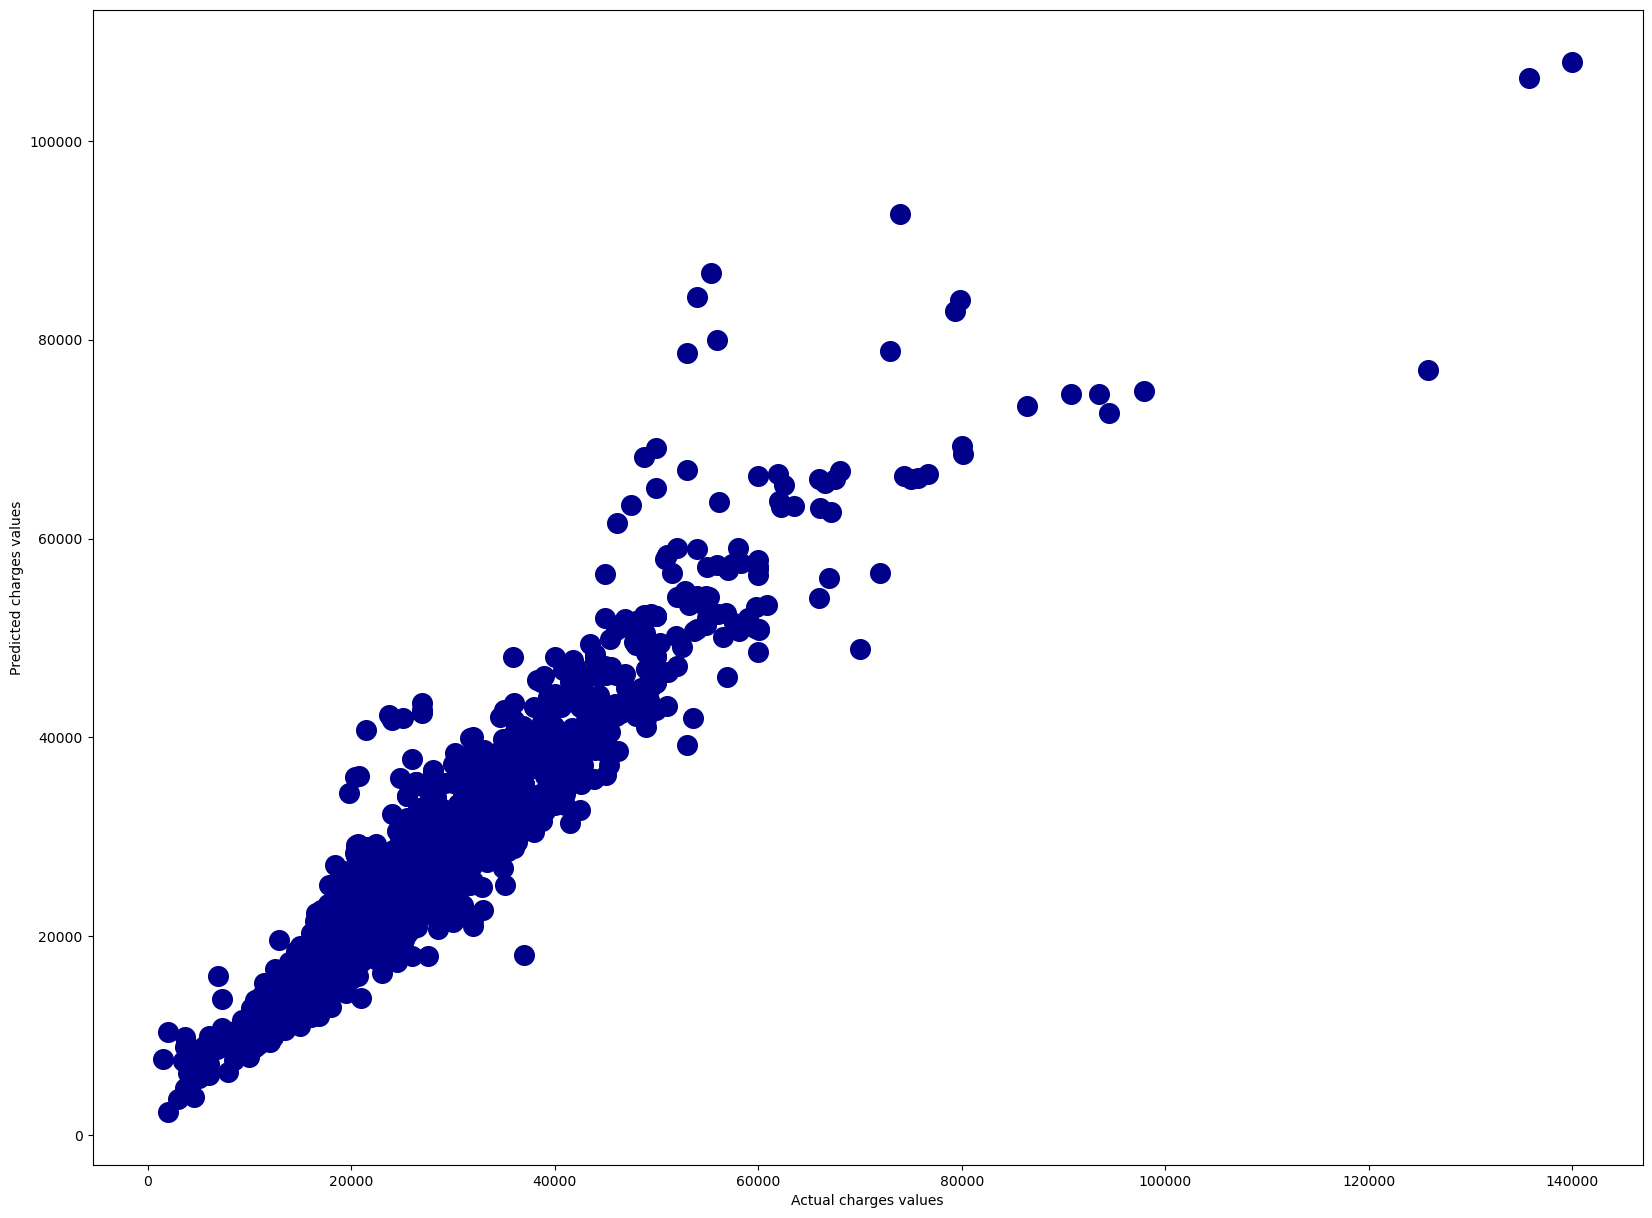

In [131]:
y_pred = model_relu_64.predict(x_test).flatten()

plt.figure(figsize=(20, 15))

plt.scatter(y_test, y_pred, s=200, c='darkblue')

plt.xlabel('Actual charges values')
plt.ylabel('Predicted charges values')
plt.show()

In [132]:
r2_score(y_test, y_pred)

0.8977197408676147

In [133]:
model_relu_64.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,469 (40.90 KB)

 Trainable params: 3,489 (13.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,980 (27.27 KB)

In [134]:
model_relu_64.save('my_model.h5')